In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
from scipy.interpolate import interp1d
from matplotlib.ticker import ScalarFormatter
from astropy.cosmology import LambdaCDM
from astropy.cosmology import w0waCDM
from astropy.cosmology import wCDM
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import pandas as pd
import sys
sys.path.append("../")

In [3]:
from pyACC.cosmology.distances import Distances

In [4]:
def hfunc_from_cosmology(z, cosmology):
    return cosmology.H(z).value

In [5]:
#DEFINISCO LE COSMOLOGIE 
cosmo_fiduciale = LambdaCDM(H0=67.14, Om0=0.3169, Ode0=1-0.3169)
cosmo_DESI_CMB = LambdaCDM(H0=68.17, Om0=0.3027, Ode0=0.6973)
cosmo_wowa_CDM = w0waCDM(H0=66.74, Om0=0.3191, Ode0=0.6809, w0=-0.752, wa=-0.86)
cosmo_DESI = LambdaCDM(H0=68.51, Om0=0.2977, Ode0=1-0.2977)
cosmo_wcdm= wCDM(H0=67.34, Om0=0.3098, Ode0=1-0.3098, w0=-0.971)
cosmo_wowa_CDM_DESI = w0waCDM(H0=66.74, Om0=0.319, Ode0=1-0.319, w0=-0.781, wa=-0.72)
cosmo_DESY5 = LambdaCDM(H0=66.7, Om0=0.35, Ode0=1-0.35)
z_values = np.linspace(0.02, 3, 100)

In [6]:
df = pd.read_csv("dati_desi.csv")
print(df)
rd_model = 147.05  
rd_fid   = 147.05

      Tracer   zeff  alpha_iso  alpha_iso_err  alpha_AP  alpha_AP_err   DV_rd  \
0        BGS  0.295     0.9857         0.0093       NaN           NaN     NaN   
1       LRG1  0.510     0.9911         0.0077    0.9555        0.0261  12.720   
2       LRG2  0.706     0.9749         0.0067    0.9842        0.0227  16.050   
3  LRG3+ELG1  0.934     0.9886         0.0046    1.0237        0.0157  19.721   
4       ELG2  1.321     0.9911         0.0071    1.0257        0.0237  24.252   
5        QSO  1.484     1.0032         0.0153    0.9885        0.0564  26.055   
6        Lya  2.330     0.9971         0.0082    1.0071        0.0216  31.267   

   DV_rd_err  DM_DH  DM_DH_err  rV_M_H   DM_rd  DM_rd_err   DH_rd  DH_rd_err  \
0      7.942  0.075        NaN     NaN     NaN        NaN     NaN        NaN   
1      0.099  0.622      0.017   0.050  13.588      0.167  21.863      0.425   
2      0.110  0.892      0.021  -0.018  17.351      0.177  19.455      0.330   
3      0.091  1.223      0.019 

In [7]:
#CALCOLO LA DISTANZA VOLUMETRICA 
Distanza_DESI_CMB = Distances(lambda z: hfunc_from_cosmology(z, cosmo_DESI_CMB))
D_v_DESI_CMB = np.array([Distanza_DESI_CMB.Dv_distance(z) for z in z_values])  
Distanza_fid = Distances(lambda z: hfunc_from_cosmology(z, cosmo_fiduciale))
D_v_fid = np.array([Distanza_fid.Dv_distance(z) for z in z_values])
D_CMB = Distances(lambda z: hfunc_from_cosmology(z, cosmo_fiduciale))
D_v_CMB = np.array([D_CMB.Dv_distance(z) for z in z_values])
Distanza_wowa_CDM = Distances(lambda z: hfunc_from_cosmology(z, cosmo_wowa_CDM))
D_v_wowa_CDM = np.array([Distanza_wowa_CDM.Dv_distance(z) for z in z_values])
Distanza_DESI = Distances(lambda z: hfunc_from_cosmology(z, cosmo_DESI))
D_v_DESI = np.array([Distanza_DESI.Dv_distance(z) for z in z_values])
Distanza_wcdm = Distances(lambda z: hfunc_from_cosmology(z, cosmo_wcdm))
D_v_wcdm = np.array([Distanza_wcdm.Dv_distance(z) for z in z_values])
Distanza_wowa_CDM_DESI = Distances(lambda z: hfunc_from_cosmology(z, cosmo_wowa_CDM_DESI))
D_v_wowa_CDM_DESI = np.array([Distanza_wowa_CDM_DESI.Dv_distance(z) for z in z_values])
Distanza_DESY5 = Distances(lambda z: hfunc_from_cosmology(z, cosmo_DESY5))
D_v_DESY5 = np.array([Distanza_DESY5.Dv_distance(z) for z in z_values])

In [8]:
#CALCOLO LA DISTANZA DI HUBBLE 
D_H_DESI_CMB = np.array([Distanza_DESI_CMB.hubble_distance(z) for z in z_values])  
D_H_fid = np.array([Distanza_fid.hubble_distance(z) for z in z_values])
D_H_CMB = np.array([D_CMB.hubble_distance(z) for z in z_values])
D_H_wowa_CDM = np.array([Distanza_wowa_CDM.hubble_distance(z) for z in z_values])
D_H_DESI = np.array([Distanza_DESI.hubble_distance(z) for z in z_values])
D_H_wcdm = np.array([Distanza_wcdm.hubble_distance(z) for z in z_values])
D_H_wowa_CDM_DESI = np.array([Distanza_wowa_CDM_DESI.hubble_distance(z) for z in z_values])
D_H_DESY5 = np.array([Distanza_DESY5.hubble_distance(z) for z in z_values])

In [9]:
alpha_parallel_fid = (D_H_CMB/ rd_model) / (D_H_fid / rd_fid)
alpha_parallel_DESI = (D_H_DESI/ rd_model) / (D_H_fid / rd_fid)
alpha_parallel_DESI_CMB = (D_H_DESI_CMB/ rd_model) / (D_H_fid / rd_fid)
alpha_parallel_DESY5 = (D_H_DESY5/ rd_model) / (D_H_fid / rd_fid)
alpha_parallel_wowa_CDM_DESI = (D_H_wowa_CDM_DESI/ rd_model) / (D_H_fid / rd_fid)
alpha_parallel_wowa_CDM = (D_H_wowa_CDM/ rd_model) / (D_H_fid / rd_fid)
alpha_parallel_wcdm = (D_H_wcdm/ rd_model) / (D_H_fid / rd_fid)

In [10]:
#PER I PUNTI
D_H = 299792.458/cosmo_fiduciale.H(df['zeff']).value
#print(D_H)
D_H_rd_data = df['DH_rd']
D_H_rd_data_err = df['DH_rd_err']
alpha_parallel = D_H_rd_data / (D_H/ rd_fid)
alpha_parallel_err = D_H_rd_data_err/ (D_H / rd_fid)

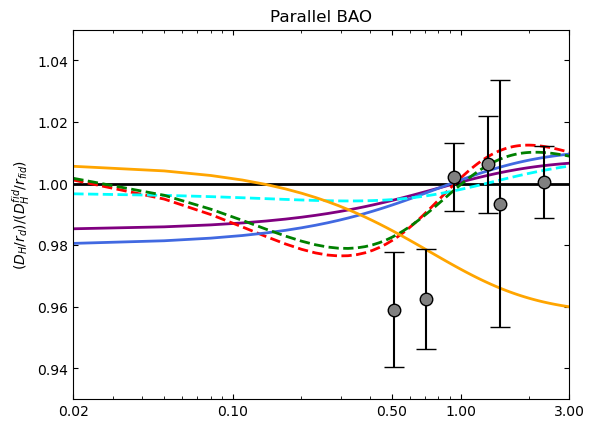

In [11]:
#SECONDO GRAFICO
plt.plot(z_values, alpha_parallel_DESI_CMB, label='ΛCDM: DESI+CMB ', color='purple', lw=2)
plt.plot(z_values, alpha_parallel_fid, label='ΛCDM: CMB', color='black', lw=2)
plt.plot(z_values, alpha_parallel_wowa_CDM, label='w0waCDM: DESI+CMB+DESY5', color='red', lw=2, linestyle='--')
plt.plot(z_values, alpha_parallel_DESI, label='ΛCDM: DESI', color='royalblue', lw=2)
plt.plot(z_values, alpha_parallel_wcdm, label='wCDM: DESI+CMB+DESY5', color='cyan', lw=2, linestyle='--')
plt.plot(z_values, alpha_parallel_wowa_CDM_DESI, label='w0waCDM: DESI+CMB+DESY5', color='green', lw=2, linestyle='--')
plt.plot(z_values, alpha_parallel_DESY5, label='ΛCDM: DESY5', color='orange', lw=2)
plt.errorbar(df['zeff'], alpha_parallel, yerr=alpha_parallel_err,
             fmt='o', markersize=9 , mfc='gray', mec='k', ecolor='k', capsize=7, label='DESI')
plt.xscale('log')
plt.ylabel(r'$(D_H/r_d)/(D_H^{fid}/r_{fid})$')
plt.title("Parallel BAO")
plt.ylim(0.93, 1.05)
plt.xlim(0.02, 3)
plt.xticks([0.02, 0.1, 0.5, 1, 3])

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, labeltop=False, labelright=False)

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
#plt.legend(loc='lower left')
plt.show()

In [12]:
D_M_DESI_CMB = np.array([Distanza_DESI_CMB.angular_diameter_distance(z) for z in z_values])  
D_M_fid = np.array([Distanza_fid.angular_diameter_distance(z) for z in z_values])
D_M_CMB = np.array([D_CMB.angular_diameter_distance(z) for z in z_values])
D_M_wowa_CDM = np.array([Distanza_wowa_CDM.angular_diameter_distance(z) for z in z_values])
D_M_DESI = np.array([Distanza_DESI.angular_diameter_distance(z) for z in z_values])
D_M_wcdm = np.array([Distanza_wcdm.angular_diameter_distance(z) for z in z_values])
D_M_wowa_CDM_DESI = np.array([Distanza_wowa_CDM_DESI.angular_diameter_distance(z) for z in z_values])
D_M_DESY5 = np.array([Distanza_DESY5.angular_diameter_distance(z) for z in z_values])

In [13]:
alpha_perp_fid = (D_M_CMB/ rd_model) / (D_M_fid / rd_fid)
alpha_perp_DESI = (D_M_DESI/ rd_model) / (D_M_fid / rd_fid)
alpha_perp_DESI_CMB = (D_M_DESI_CMB/ rd_model) / (D_M_fid / rd_fid)
alpha_perp_DESY5 = (D_M_DESY5/ rd_model) / (D_M_fid / rd_fid)
alpha_perp_wowa_CDM_DESI = (D_M_wowa_CDM_DESI/ rd_model) / (D_M_fid / rd_fid)
alpha_perp_wowa_CDM = (D_M_wowa_CDM/ rd_model) / (D_M_fid / rd_fid)
alpha_perp_wcdm = (D_M_wcdm/ rd_model) / (D_M_fid / rd_fid)

In [14]:
#PER I PUNTI
D_A = cosmo_fiduciale.angular_diameter_distance(df['zeff']) 
D_M = (1 + df['zeff']) * D_A.value 
#print(D_M)
D_M_rd_data = df['DM_rd']
D_M_rd_data_err = df['DM_rd_err']
alpha_perp = D_M_rd_data / (D_M/ rd_fid)
alpha_perp_err = D_M_rd_data_err/ (D_M / rd_fid)

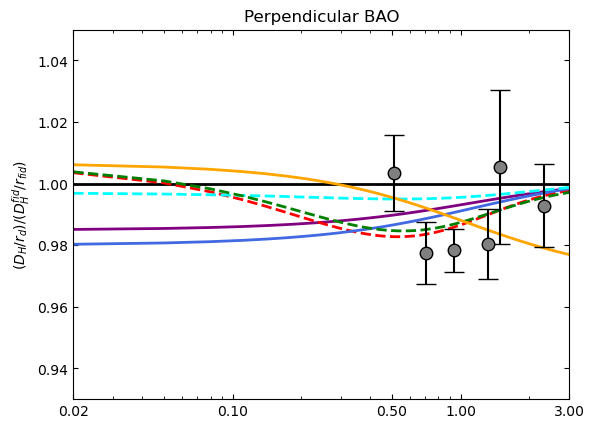

In [15]:
#TERZO GRAFICO
plt.plot(z_values, alpha_perp_DESI_CMB, label='ΛCDM: DESI+CMB ', color='purple', lw=2)
plt.plot(z_values, alpha_perp_fid, label='ΛCDM: CMB', color='black', lw=2)
plt.plot(z_values, alpha_perp_wowa_CDM, label='w0waCDM: DESI+CMB+DESY5', color='red', lw=2, linestyle='--')
plt.plot(z_values, alpha_perp_DESI, label='ΛCDM: DESI', color='royalblue', lw=2)
plt.plot(z_values, alpha_perp_wcdm, label='wCDM: DESI+CMB+DESY5', color='cyan', lw=2, linestyle='--')
plt.plot(z_values, alpha_perp_wowa_CDM_DESI, label='w0waCDM: DESI+CMB+DESY5', color='green', lw=2, linestyle='--')
plt.plot(z_values, alpha_perp_DESY5, label='ΛCDM: DESY5', color='orange', lw=2)
plt.errorbar(df['zeff'], alpha_perp, alpha_perp_err,
             fmt='o', markersize=9 , mfc='gray', mec='k', ecolor='k', capsize=7, label='DESI')
plt.xscale('log')
plt.ylabel(r'$(D_H/r_d)/(D_H^{fid}/r_{fid})$')
plt.title("Perpendicular BAO")
plt.ylim(0.93, 1.05)
plt.xlim(0.02, 3)
plt.xticks([0.02, 0.1, 0.5, 1, 3])

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, labeltop=False, labelright=False)

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
#plt.legend(loc='lower left')
plt.show()

In [16]:

#CALCOLO ALPHA 
alpha_fid = (D_v_CMB/ rd_model) / (D_v_fid / rd_fid)
alpha_DESI = (D_v_DESI/ rd_model) / (D_v_fid / rd_fid)
alpha_DESI_CMB = (D_v_DESI_CMB/ rd_model) / (D_v_fid / rd_fid)
alpha_DESY5 = (D_v_DESY5/ rd_model) / (D_v_fid / rd_fid)
alpha_wowa_CDM_DESI = (D_v_wowa_CDM_DESI/ rd_model) / (D_v_fid / rd_fid)
alpha_wowa_CDM = (D_v_wowa_CDM/ rd_model) / (D_v_fid / rd_fid)
alpha_wcdm = (D_v_wcdm/ rd_model) / (D_v_fid / rd_fid)

In [17]:
#PER I PUNTI
#print(D_M)
D_V= (df['zeff']*D_M**2*D_H)**(1/3)
D_V_rd_data = df['DV_rd']
D_V_rd_data_err = df['DV_rd_err']
alpha_iso = D_V_rd_data / (D_V/ rd_fid)
alpha_iso_err = D_V_rd_data_err/ (D_V / rd_fid)

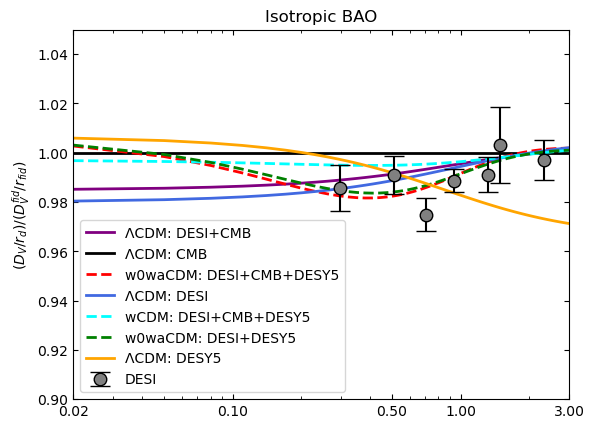

In [18]:
#PRIMO GRAFICO
plt.plot(z_values, alpha_DESI_CMB, label='ΛCDM: DESI+CMB ', color='purple', lw=2)
plt.plot(z_values, alpha_fid, label='ΛCDM: CMB', color='black', lw=2)
plt.plot(z_values, alpha_wowa_CDM, label='w0waCDM: DESI+CMB+DESY5', color='red', lw=2, linestyle='--')
plt.plot(z_values, alpha_DESI, label='ΛCDM: DESI', color='royalblue', lw=2)
plt.plot(z_values, alpha_wcdm, label='wCDM: DESI+CMB+DESY5', color='cyan', lw=2, linestyle='--')
plt.plot(z_values, alpha_wowa_CDM_DESI, label='w0waCDM: DESI+DESY5', color='green', lw=2, linestyle='--')
plt.plot(z_values, alpha_DESY5, label='ΛCDM: DESY5', color='orange', lw=2)
plt.errorbar(df['zeff'], df['alpha_iso'] , yerr=df['alpha_iso_err'],
             fmt='o', markersize=9 , mfc='gray', mec='k', ecolor='k', capsize=7, label='DESI')
plt.xscale('log')
plt.ylabel(r'$(D_V/r_d)/(D_V^{fid}/r_{fid})$')
plt.title("Isotropic BAO")
plt.ylim(0.90, 1.05)
plt.xlim(0.02, 3)
plt.xticks([0.02, 0.1, 0.5, 1, 3])

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, labeltop=False, labelright=False)

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.legend(loc='lower left')
plt.show()